Our problem is as follows.

We have a point $x_0, y_0$ that lies at the center of our minima. We want to know what the local volume estimated from this point will be. Let our starting point be denoted by two parameters, $a$, the minima value, and $b$, the scale. Let our point be $(ab, a/b)$.

# Edges

The edges of our minima correspond to $a \pm w = xy \implies (x, \frac{a \pm w}{x})$. 

# Radius

Our local volume estimation involves computing a radius. We extend a line out from our origin $(ab + r \sin p, a/b + r \cos p)$. We want to find, for a given a, b, p, the smallest positive r such that $(ab + r \sin p, a/b + r \cos p) = (x, \frac{a \pm w}{x})$

# Symmetrical Approach 

Note the sign of minima doesn't matter, since it amounts to a reflection about an axis (either one). So without loss of generality, consider only a minima given by $a \geq 0$. Furthermore, note that the problem is ultimately symmetric about $(x, y) \rightarrow (-x, -y)$. Therefore without loss of generality, consider our source point to have $x, y > 0$. 

There is one distinction which matters a lot even with these symmetries, which is whether or not $w > a$. If this is the case, then the structure of the bounds is different. First we consider the case where $w < a$, and consider that case later.

In the case where $a > w, 0$, with our point in the upper quadrant, the boundaries that a line from our source point (given by $ab, a/b$) reaches are given by where it meets our lower bound $\big( x, \frac{a - w}{x} \big)$ and the upper bound $\big( x, \frac{a + w}{x} \big)$. Considering a line pointing outwards from our point given by $(ab + r \sin p, a/b + r \cos p)$, it will hit our lower bound for angles $p$ up until a critical angle.

This critical angle is the angle for which the slope of the upper bound is equal to the slope of the line from that point on the upper bound to the source point. Specifically, there are two critical $x_c$ values, for which the slope at the upper bound, given by

$$
\frac{d}{dx} \frac{a + w}{x} = - \frac{a + w}{x^2}
$$

is equal to the slope of the line connecting a point on the upper bound to the source point given by (note that the upper bound point is $x_1, y_1$):

$$
\frac{y_2 - y_1}{x_2 - x_1} = \frac{\frac{a}{b} - \frac{a + w}{x_c}}{ab - x_c}
$$

Setting slope at $x_c$ equal to slope from $x_c$ on upper bound to source point yields

$$
-\frac{a + w}{x_c^2} = \frac{\frac{a}{b} - \frac{a + w}{x_c}}{ab - x_c}
$$

$$
-a - w = \frac{\frac{a}{b}x_c^2 - (a + w)x_c }{ab - x_c}
$$

$$
\big(-a - w\big)\big(ab - x_c\big) = \frac{a}{b}x_c^2 - (a + w)x_c
$$

which simplifis to

$$
0 = a x_c^2 - 2 b (a + w) x_c + a b^2 (a + w)
$$

Solving this quadratic gives the final answer

$$
\boxed{x_c = \frac{b(a + w) \pm b\sqrt{(a + w)w}}{a}}
$$


## Code Check

We check these critical points by plotting.

First critical point: (x_c1, y_c1) = (3.3798, 0.3551)
Second critical point: (x_c2, y_c2) = (1.4202, 0.8449)


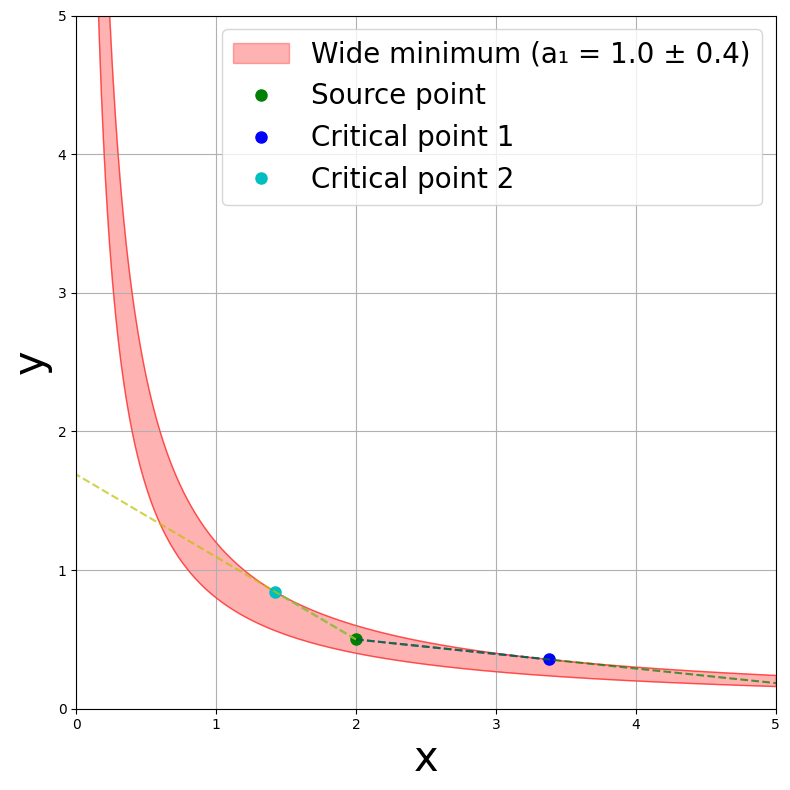

In [6]:
import numpy as np
import matplotlib.pyplot as plt

source_scale = 2.0
b = source_scale
source_x = source_scale
source_y = 1/source_scale

# Parameters for the red curve (wide minimum)
a1 = 1.0
w1 = 0.2

# Calculate the two critical x_c values
x_c1 = (b*(a1 + w1) + b * np.sqrt(w1*(a1 + w1)))
x_c2 = (b*(a1 + w1) - b * np.sqrt(w1*(a1 + w1)))

# Calculate corresponding y values (on upper boundary curve y = (a + w)/x)
y_c1 = (a1 + w1) / x_c1
y_c2 = (a1 + w1) / x_c2

print(f"First critical point: (x_c1, y_c1) = ({x_c1:.4f}, {y_c1:.4f})")
print(f"Second critical point: (x_c2, y_c2) = ({x_c2:.4f}, {y_c2:.4f})")

### PLOTTING CODE ###

# Plot range
x_min, x_max = 0, 5
y_min, y_max = 0, 5

# Create x values (avoid x=0)
x_pos = np.linspace(1e-10, x_max, 500)  # Positive x

# Calculate bounds for both regions
def calculate_bounds(x, a, w):
    """Calculate upper and lower bounds for given parameters"""
    x_inv = 1/x
    upper = (a + w)*x_inv
    lower = (a - w)*x_inv
    return upper, lower

red_upper_pos, red_lower_pos = calculate_bounds(x_pos, a1, w1)

# Create the plot
plt.figure(figsize=(8, 8))

# Fill the regions
plt.fill_between(x_pos, red_lower_pos, red_upper_pos, color='red', alpha=0.3, label=f'Wide minimum (a₁ = {a1} ± {2*w1})')

# Plot boundary lines
plt.plot(x_pos, red_upper_pos, color='red', linestyle='-', linewidth=1, alpha=0.5)
plt.plot(x_pos, red_lower_pos, color='red', linestyle='-', linewidth=1, alpha=0.5)

# Plot source point
plt.plot(source_x, source_y, 'go', markersize=8, label='Source point')

# Plot critical points
plt.plot(x_c1, y_c1, 'bo', markersize=8, label='Critical point 1')
plt.plot(x_c2, y_c2, 'co', markersize=8, label='Critical point 2')

# Draw lines from source to critical points
plt.plot([source_x, x_c1], [source_y, y_c1], 'b--', linewidth=1.5, alpha=0.7)
plt.plot([source_x, x_c2], [source_y, y_c2], 'c--', linewidth=1.5, alpha=0.7)

plt.plot([source_x, (x_c1-source_x)*10 + source_x], [source_y, (y_c1-source_y)*10 + source_y], 'g--', linewidth=1.5, alpha=0.7)
plt.plot([source_x, (x_c2-source_x)*10 + source_x], [source_y, (y_c2-source_y)*10 + source_y], 'y--', linewidth=1.5, alpha=0.7)

# Plot settings
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(fontsize=20, loc='upper right')

plt.tight_layout()
plt.show()

We can confirm these are indeed the critical points. Next, we compute the critical y values, and then the critical angles.

$$
\boxed{y_c = \frac{a(a + w)}{b(a + w) \pm b\sqrt{(a + w)w}}}
$$

We now know the critical points, given by

$$
\bigg( x_c = \frac{b(a + w) \pm b\sqrt{(a + w)w}}{a}, y_c = \frac{a(a + w)}{b(a + w) \pm b\sqrt{(a + w)w}}\bigg)
$$

We could estimate the volume radially, as was originally suggested. But this is quite difficult and complex, due to all the radial integrals. Instead, we estimate the volume in the $x-y$ axis (which is much easier given the functions). This volume integral is much simpler, since it consists of three parts: an integral of the difference between the upper straight line and the lower boundary, an integral of the difference between the two boundaries, and finally an integral of the difference between the second upper straight line and the lower boundary.

$$
\int_{x_i}^{x_{c, 1}}\bigg( m_i x + b_i - \frac{a - w}{x} \bigg) dx + \int_{x_{c, 1}}^{x_{c, 2}}\bigg(\frac{2 w}{x} \bigg) dx + \int_{x_{c, 2}}^{x_f}\bigg( m_f x + b_f - \frac{a - w}{x} \bigg) dx
$$

Where $x_i, x_f$ are the endpoints of our shape, defined by $m_i x + b_i - \frac{a - w}{x} = 0$ and likewise for subscript $f$. Note that the slopes and offsets $m_i, m_f, b_i, b_f$ are actually determined exactly by our critical points.

## Critical Lines

Given the critical points, we solve for the critical lines. First, i.

The slope of a critical line is the slope of the upper bound at the critical point, given by

$$
\frac{d}{dx} \frac{a + w}{x} = - \frac{a + w}{x^2} = m
$$

So for our critical points, the slopes are 

$$
\boxed{m_{\pm} = -\frac{a^2}{b^2(a + w)\left(1 \pm \sqrt{\frac{w}{a + w}}\right)^2}}
$$

These represent the slopes of the upper bounding curve at the two critical $x$-locations where the constraint touches or intersects the elliptical region or feasible domain. For the b values, we know that $m_i x_c + b_i = y_c$, implying

$$
m x_c + b_i = -\frac{a + w}{x_c} + b_i = \frac{a(a + w)}{b(a + w) \pm b\sqrt{(a + w)w}}
$$

meaning

$$
b_i = \frac{a(a + w)}{b(a + w) \pm b\sqrt{(a + w)w}} + \frac{a + w}{x_c} = \frac{a(a + w)}{b(a + w) \pm b\sqrt{(a + w)w}} + \frac{a(a + w)}{b(a + w) \pm b\sqrt{(a + w)w}}
$$

$$
b_i = \frac{a}{b} \frac{2}{1 \pm \sqrt{\frac{w}{a+w}}}
$$

Somewhat unfortunate notation here. Remember to change that later, mx + b doesn't work because b already has a meaning.

Anyways, we have the equations of the straight lines. Let's test it again by code.

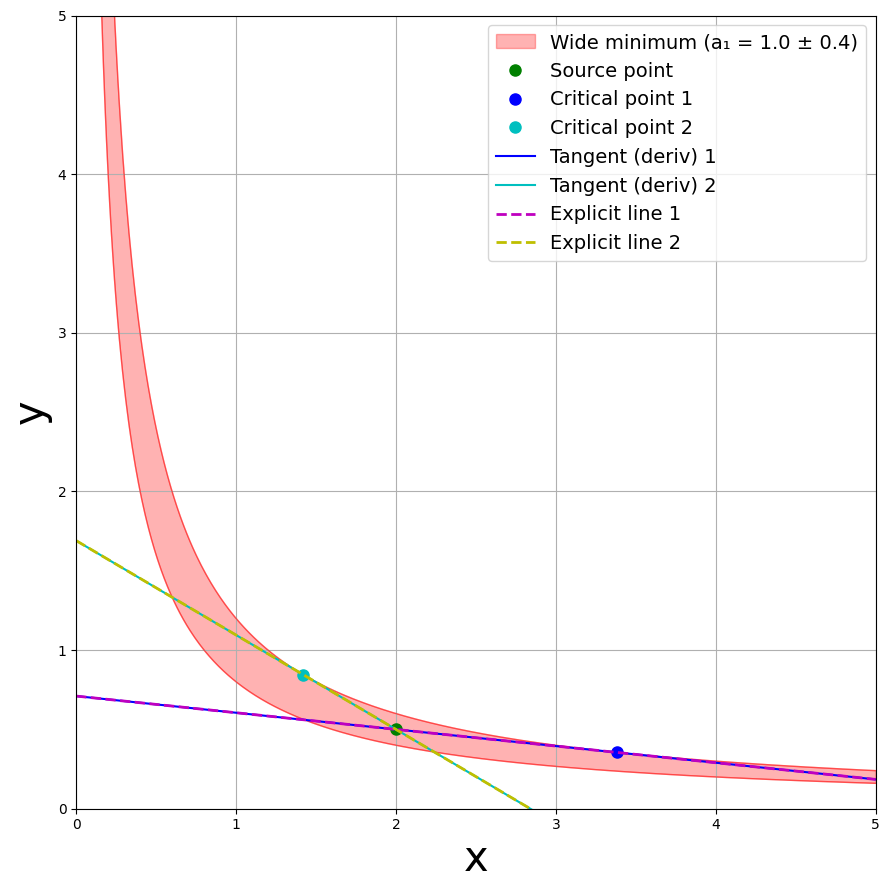

In [5]:
import numpy as np
import matplotlib.pyplot as plt

source_scale = 2.0
b = source_scale
source_x = source_scale
source_y = 1 / source_scale

# Parameters for the red curve (wide minimum)
a1 = 1.0
w1 = 0.2

# Calculate the two critical x_c values
x_c1 = (b * (a1 + w1) + b * np.sqrt(w1 * (a1 + w1))) / a1
x_c2 = (b * (a1 + w1) - b * np.sqrt(w1 * (a1 + w1))) / a1

# Calculate corresponding y values (on upper boundary curve y = (a + w)/x)
y_c1 = (a1 + w1) / x_c1
y_c2 = (a1 + w1) / x_c2

# -------- Slope and intercept from derivative at critical points -------- #
m1 = -(a1 + w1) / (x_c1 ** 2)
m2 = -(a1 + w1) / (x_c2 ** 2)
b1_i = y_c1 - m1 * x_c1
b2_i = y_c2 - m2 * x_c2

# -------- Analytic formulas (explicit) -------- #
sqrt_term = np.sqrt(w1 / (a1 + w1))
factor_plus = (1 + sqrt_term)
factor_minus = (1 - sqrt_term)

m1_analytic = - (a1**2) / (b**2 * (a1 + w1) * factor_plus**2)
m2_analytic = - (a1**2) / (b**2 * (a1 + w1) * factor_minus**2)

b1_analytic = (a1 / b) * (2 / factor_plus)
b2_analytic = (a1 / b) * (2 / factor_minus)

# Line functions
def line(x, m, b):
    return m * x + b

### PLOTTING CODE ###

# Plot range
x_min, x_max = 0, 5
y_min, y_max = 0, 5

x_pos = np.linspace(1e-10, x_max, 500)

def calculate_bounds(x, a, w):
    x_inv = 1 / x
    upper = (a + w) * x_inv
    lower = (a - w) * x_inv
    return upper, lower

red_upper_pos, red_lower_pos = calculate_bounds(x_pos, a1, w1)

plt.figure(figsize=(9, 9))

# Fill the region
plt.fill_between(x_pos, red_lower_pos, red_upper_pos, color='red', alpha=0.3, label=f'Wide minimum (a₁ = {a1} ± {2*w1})')
plt.plot(x_pos, red_upper_pos, color='red', linestyle='-', linewidth=1, alpha=0.5)
plt.plot(x_pos, red_lower_pos, color='red', linestyle='-', linewidth=1, alpha=0.5)

# Plot source
plt.plot(source_x, source_y, 'go', markersize=8, label='Source point')

# Plot critical points
plt.plot(x_c1, y_c1, 'bo', markersize=8, label='Critical point 1')
plt.plot(x_c2, y_c2, 'co', markersize=8, label='Critical point 2')

# Plot tangent lines from derivative-based slope/intercepts
plt.plot(x_pos, line(x_pos, m1, b1_i), 'b-', linewidth=1.5, label='Tangent (deriv) 1')
plt.plot(x_pos, line(x_pos, m2, b2_i), 'c-', linewidth=1.5, label='Tangent (deriv) 2')

# Plot analytic lines
plt.plot(x_pos, line(x_pos, m1_analytic, b1_analytic), 'm--', linewidth=2.0, label='Explicit line 1')
plt.plot(x_pos, line(x_pos, m2_analytic, b2_analytic), 'y--', linewidth=2.0, label='Explicit line 2')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()

Great fits. Now we compute the starting and end points, meaning

$$
-\frac{a^2}{b^2(a + w)\left(1 \pm \sqrt{\frac{w}{a + w}}\right)^2} x + \frac{a}{b} \frac{2}{1 \pm \sqrt{\frac{w}{a+w}}} - \frac{a - w}{x} = 0
$$ 

We need to solve this for x. Note that for each choice of $\pm$ (corresponding to a critical value), there will be two solutions for $x$. However, we know a priori that if we chose a smaller value of $x_c$, we want the even smaller solution here, and likewise for the larger value (since we're looking for the limits).

The solutions to the equation are given by:
$$
\boxed{x = \frac{b (a + w)}{a} \left(1 \pm \sqrt{\frac{2w}{a + w}}\right) \left(1 \pm \sqrt{\frac{w}{a + w}}\right)}
$$

Conveniently, choosing the same $\pm$ results in correct output choices.

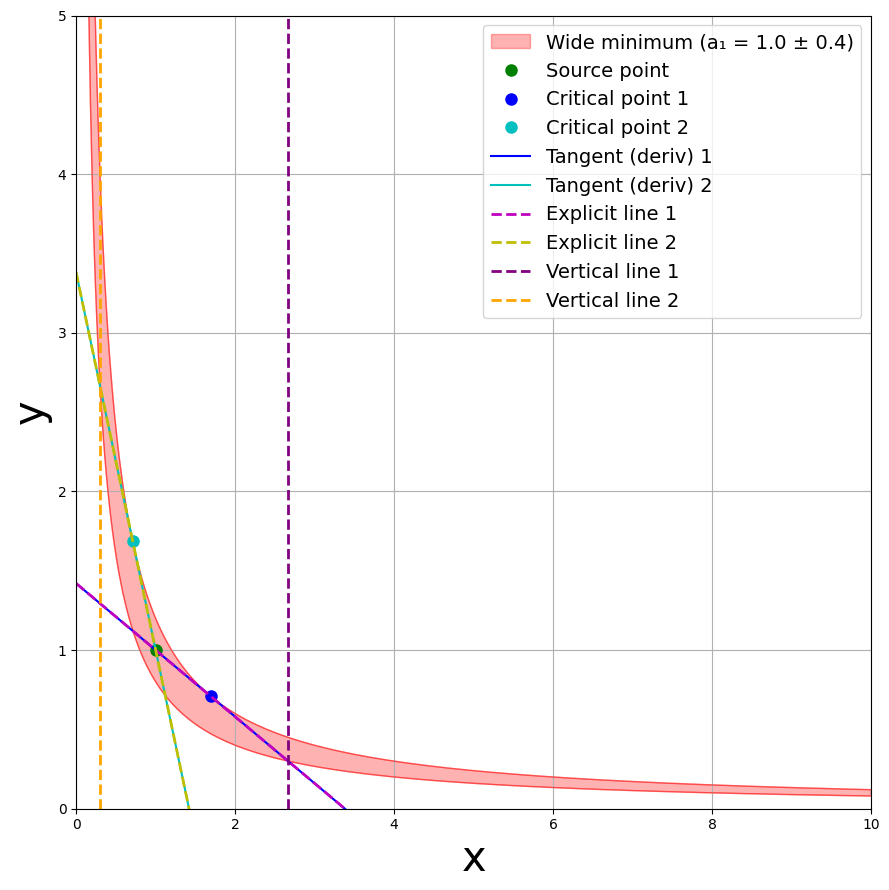

In [9]:
import numpy as np
import matplotlib.pyplot as plt

source_scale = 1.0
b = source_scale
source_x = source_scale
source_y = 1 / source_scale

# Parameters for the red curve (wide minimum)
a1 = 1.0
w1 = 0.2

# Calculate the two critical x_c values
x_c1 = (b * (a1 + w1) + b * np.sqrt(w1 * (a1 + w1))) / a1
x_c2 = (b * (a1 + w1) - b * np.sqrt(w1 * (a1 + w1))) / a1

# Calculate corresponding y values (on upper boundary curve y = (a + w)/x)
y_c1 = (a1 + w1) / x_c1
y_c2 = (a1 + w1) / x_c2

# -------- Slope and intercept from derivative at critical points -------- #
m1 = -(a1 + w1) / (x_c1 ** 2)
m2 = -(a1 + w1) / (x_c2 ** 2)
b1_i = y_c1 - m1 * x_c1
b2_i = y_c2 - m2 * x_c2

# -------- Analytic formulas (explicit) -------- #
sqrt_term = np.sqrt(w1 / (a1 + w1))
factor_plus = (1 + sqrt_term)
factor_minus = (1 - sqrt_term)

m1_analytic = - (a1**2) / (b**2 * (a1 + w1) * factor_plus**2)
m2_analytic = - (a1**2) / (b**2 * (a1 + w1) * factor_minus**2)

b1_analytic = (a1 / b) * (2 / factor_plus)
b2_analytic = (a1 / b) * (2 / factor_minus)

# Line function
def line(x, m, b):
    return m * x + b

### NEW: Compute x-values for vertical lines ###
sqrt_w = np.sqrt(w1 / (a1 + w1))
sqrt_2w = np.sqrt(2 * w1 / (a1 + w1))

x_vert1 = (b * (a1 + w1) / a1) * (1 + sqrt_2w) * (1 + sqrt_w)
x_vert2 = (b * (a1 + w1) / a1) * (1 - sqrt_2w) * (1 - sqrt_w)

### PLOTTING CODE ###
x_min, x_max = 0, 10
y_min, y_max = 0, 5

x_pos = np.linspace(1e-10, x_max, 500)

def calculate_bounds(x, a, w):
    x_inv = 1 / x
    upper = (a + w) * x_inv
    lower = (a - w) * x_inv
    return upper, lower

red_upper_pos, red_lower_pos = calculate_bounds(x_pos, a1, w1)

plt.figure(figsize=(9, 9))

# Fill the region
plt.fill_between(x_pos, red_lower_pos, red_upper_pos, color='red', alpha=0.3, label=f'Wide minimum (a₁ = {a1} ± {2*w1})')
plt.plot(x_pos, red_upper_pos, color='red', linestyle='-', linewidth=1, alpha=0.5)
plt.plot(x_pos, red_lower_pos, color='red', linestyle='-', linewidth=1, alpha=0.5)

# Plot source
plt.plot(source_x, source_y, 'go', markersize=8, label='Source point')

# Plot critical points
plt.plot(x_c1, y_c1, 'bo', markersize=8, label='Critical point 1')
plt.plot(x_c2, y_c2, 'co', markersize=8, label='Critical point 2')

# Tangent lines from derivative-based slopes
plt.plot(x_pos, line(x_pos, m1, b1_i), 'b-', linewidth=1.5, label='Tangent (deriv) 1')
plt.plot(x_pos, line(x_pos, m2, b2_i), 'c-', linewidth=1.5, label='Tangent (deriv) 2')

# Analytic lines
plt.plot(x_pos, line(x_pos, m1_analytic, b1_analytic), 'm--', linewidth=2.0, label='Explicit line 1')
plt.plot(x_pos, line(x_pos, m2_analytic, b2_analytic), 'y--', linewidth=2.0, label='Explicit line 2')

# NEW: Vertical lines
plt.axvline(x_vert1, color='purple', linestyle='--', linewidth=2.0, label='Vertical line 1')
plt.axvline(x_vert2, color='orange', linestyle='--', linewidth=2.0, label='Vertical line 2')

# Plot settings
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()

This works. So our final integral for this case is given by

$$
\int_{x_i}^{x_{c, 1}}\bigg( m_i x + b_i - \frac{a - w}{x} \bigg) dx + \int_{x_{c, 1}}^{x_{c, 2}}\bigg(\frac{2 w}{x} \bigg) dx + \int_{x_{c, 2}}^{x_f}\bigg( m_f x + b_f - \frac{a - w}{x} \bigg) dx
$$

Where

$$
x_i = \frac{b (a + w)}{a} \left(1 - \sqrt{\frac{2w}{a + w}}\right) \left(1 - \sqrt{\frac{w}{a + w}}\right)
$$
$$
m_i = -\frac{a^2}{b^2(a + w)\left(1 - \sqrt{\frac{w}{a + w}}\right)^2}
$$
$$
b_i = \frac{a}{b} \frac{2}{1 - \sqrt{\frac{w}{a+w}}}
$$


$$
x_{c, 1} = \frac{b(a + w) - b\sqrt{(a + w)w}}{a} = \frac{b(a + w)}{a}\left(1 - \sqrt{\frac{w}{a + w}}\right)
$$
$$
x_{c, 2} = \frac{b(a + w) + b\sqrt{(a + w)w}}{a} = \frac{b(a + w)}{a}\left(1 + \sqrt{\frac{w}{a + w}}\right)
$$
$$
x_f = \frac{b (a + w)}{a} \left(1 + \sqrt{\frac{2w}{a + w}}\right) \left(1 + \sqrt{\frac{w}{a + w}}\right)
$$
$$
m_f = -\frac{a^2}{b^2(a + w)\left(1 + \sqrt{\frac{w}{a + w}}\right)^2}
$$
$$
b_f = \frac{a}{b} \frac{2}{1 + \sqrt{\frac{w}{a+w}}}
$$

## Integrals

First, we compute the integrals


$$
\int \left( m_i x + b_i - \frac{a - w}{x} \right) dx = m_i \frac{x^2}{2} + b_i x - (a - w) \log x
$$

$$
\int \frac{2w}{x} dx = 2w \log x
$$

$$
\int \left( m_f x + b_f - \frac{a - w}{x} \right) dx = m_f \frac{x^2}{2} + b_f x - (a - w) \log x
$$


We ignore the constants of integration.

Think about what we're actually interested in - we know that higher w makes this higher. How does higher a and b change things though? unknown.

The volume is thus

$$
V = \big[m_i \frac{x^2}{2} + b_i x - (a - w) \log x \big]_{x_i}^{x_{c, 1}} + 2w \big[\log x \big]_{x_{c, 1}}^{x_{c, 2}} + \big[m_f \frac{x^2}{2} + b_f x - (a - w) \log x \big]_{x_{c, 2}}^{x_{f}}
$$

$$
V = \big[m_i \frac{x^2}{2} + b_i x \big]_{x_i}^{x_{c, 1}} + \big[m_f \frac{x^2}{2} + b_f x\big]_{x_{c, 2}}^{x_{f}} + 2w \big[\log x \big]_{x_{c, 1}}^{x_{c, 2}} - (a - w)\bigg(\big[log x \big]_{x_i}^{x_{c, 1}} + \big[log x \big]_{x_{c, 2}}^{x_{f}}\bigg)
$$

We expand the log terms:

1. $\left[\log x\right]_{x_{c,1}}^{x_{c,2}} = \log x_{c,2} - \log x_{c,1}$

2. $\left[\log x\right]_{x_i}^{x_{c,1}} = \log x_{c,1} - \log x_i$

3. $\left[\log x\right]_{x_{c,2}}^{x_f} = \log x_f - \log x_{c,2}$

Now plug them into the expression:

$$
2w(\log x_{c,2} - \log x_{c,1}) - (a - w)\left[(\log x_{c,1} - \log x_i) + (\log x_f - \log x_{c,2})\right]
$$

Distribute everything:

$$
= 2w\log x_{c,2} - 2w\log x_{c,1} - (a - w)\log x_{c,1} + (a - w)\log x_i - (a - w)\log x_f + (a - w)\log x_{c,2}
$$

grouping yields

$$
(a + w)\log \frac{x_{c,2}}{x_{c,1}} + (a - w)\log \frac{x_i}{x_f}
$$

for the final expression

$$
V = \big[m_i \frac{x^2}{2} + b_i x \big]_{x_i}^{x_{c, 1}} + \big[m_f \frac{x^2}{2} + b_f x\big]_{x_{c, 2}}^{x_{f}} + (a + w)\log \frac{x_{c,2}}{x_{c,1}} + (a - w)\log \frac{x_i}{x_f}
$$

We can try a bit further too

$$
V = \frac{m_i}{2}(x_{c,1}^2 - x_i^2) + b_i(x_{c,1} - x_i) + \frac{m_f}{2}(x_f^2 - x_{c,2}^2) + b_f(x_f - x_{c,2}) + (a + w)\log\left(\frac{x_{c,2}}{x_{c,1}}\right) + (a - w)\log\left(\frac{x_i}{x_f}\right)
$$

But nowhere to go from here, aside from substituting in the values.

We have the explicit values above. Make sure to remember our ultimate goals: we want to gain good understanding of the roles of a and b. Ideally we would like to know if wide minima can ever be ranked below shallow minima, and if so, by how much. This expression must be an increasing function of w, but the dependence on other variables is less clear.

# Volume Formula

In summary

$$
x_{c, 2} = \frac{b(a + w) + b\sqrt{(a + w)w}}{a} = \frac{b(a + w)}{a}\left(1 + \sqrt{\frac{w}{a + w}}\right)
$$
$$
x_f = \frac{b (a + w)}{a} \left(1 + \sqrt{\frac{2w}{a + w}}\right) \left(1 + \sqrt{\frac{w}{a + w}}\right)
$$
$$
m_f = -\frac{a^2}{b^2(a + w)\left(1 + \sqrt{\frac{w}{a + w}}\right)^2}
$$
$$
b_f = \frac{a}{b} \frac{2}{1 + \sqrt{\frac{w}{a+w}}}
$$

First, the log terms

$$
(a + w)\log\left(\frac{x_{c,2}}{x_{c,1}}\right) + (a - w)\log\left(\frac{x_i}{x_f}\right) = (a + w)\log\left(\frac{1 + \sqrt{\frac{w}{a + w}}}{1 - \sqrt{\frac{w}{a + w}}}\right) + (a - w)\log\left(\frac{\left(1 - \sqrt{\frac{2w}{a + w}}\right) \left(1 - \sqrt{\frac{w}{a + w}}\right)}{\left(1 + \sqrt{\frac{2w}{a + w}}\right) \left(1 + \sqrt{\frac{w}{a + w}}\right)}\right)
$$

Next, the non-log terms

$$
\frac{m_i}{2}(x_{c,1}^2 - x_i^2) + b_i(x_{c,1} - x_i) + \frac{m_f}{2}(x_f^2 - x_{c,2}^2) + b_f(x_f - x_{c,2})
$$

This is super difficult to handle. First

$$
x_{c,1}^2 - x_i^2 = \left(\frac{b (a + w)}{a}\right)^2 \left(\left(1 - \sqrt{\frac{w}{a + w}}\right)^2 - \left( \left(1 - \sqrt{\frac{2w}{a + w}}\right) \left(1 - \sqrt{\frac{w}{a + w}}\right)\right)^2 \right)
$$

becomes
$$
x_{c,1}^2 - x_i^2 = \left(\frac{b (a + w)}{a}\right)^2 \left(1 - \sqrt{\frac{w}{a + w}}\right)^2 \left(1 -  \left(1 - \sqrt{\frac{2w}{a + w}}\right)^2  \right)
$$

$$
x_{c,1}^2 - x_i^2 = 2\left(\frac{b (a + w)}{a}\right)^2 \left(1 - \sqrt{\frac{w}{a + w}}\right)^2 \left(\sqrt{\frac{2w}{a + w}} - \frac{w}{a + w} \right)
$$

$$
x_{c,1} - x_i = \frac{b(a + w)}{a}\left(1 - \sqrt{\frac{w}{a + w}}\right) - \frac{b (a + w)}{a} \left(1 - \sqrt{\frac{2w}{a + w}}\right) \left(1 - \sqrt{\frac{w}{a + w}}\right)
$$
$$
x_{c,1} - x_i = \frac{b(a + w)}{a}\left(1 - \sqrt{\frac{w}{a + w}}\right)\bigg(1 - \left(1 - \sqrt{\frac{2w}{a + w}}\right)\bigg)
$$

$$
x_{c,1} - x_i = \frac{b(a + w)}{a}\left(1 - \sqrt{\frac{w}{a + w}}\right)\bigg(\sqrt{\frac{2w}{a + w}}\bigg)
$$

$$
x_f^2 - x_{c,2}^2 = \left(\frac{b (a + w)}{a}\right)^2 \left(-\left(1 + \sqrt{\frac{w}{a + w}}\right)^2 + \left( \left(1 + \sqrt{\frac{2w}{a + w}}\right) \left(1 + \sqrt{\frac{w}{a + w}}\right)\right)^2 \right)
$$

$$
x_f^2 - x_{c,2}^2 = \left(\frac{b (a + w)}{a}\right)^2 \left(1 + \sqrt{\frac{w}{a + w}}\right)^2\left(-1 + \left(1 + \sqrt{\frac{2w}{a + w}} \right)^2 \right)
$$

$$
x_f^2 - x_{c,2}^2 = 2\left(\frac{b (a + w)}{a}\right)^2 \left(1 + \sqrt{\frac{w}{a + w}}\right)^2\left(\sqrt{\frac{2w}{a + w}} + \frac{w}{a + w} \right)
$$

$$
x_f - x_{c,2} = \frac{b (a + w)}{a} \left(1 + \sqrt{\frac{2w}{a + w}}\right) \left(1 + \sqrt{\frac{w}{a + w}}\right) - \frac{b(a + w)}{a}\left(1 + \sqrt{\frac{w}{a + w}}\right)
$$

$$
x_f - x_{c,2} = \frac{b(a + w)}{a}\left(1 + \sqrt{\frac{w}{a + w}}\right)\bigg(\sqrt{\frac{2w}{a + w}}\bigg)
$$

This gives our four terms of interest.

$$
x_{c,1}^2 - x_i^2 = 2\left(\frac{b (a + w)}{a}\right)^2 \left(1 - \sqrt{\frac{w}{a + w}}\right)^2 \left(\sqrt{\frac{2w}{a + w}} - \frac{w}{a + w} \right)
$$
$$
x_{c,1} - x_i = \frac{b(a + w)}{a}\left(1 - \sqrt{\frac{w}{a + w}}\right)\bigg(\sqrt{\frac{2w}{a + w}}\bigg)
$$
$$
x_f^2 - x_{c,2}^2 = 2\left(\frac{b (a + w)}{a}\right)^2 \left(1 + \sqrt{\frac{w}{a + w}}\right)^2\left(\sqrt{\frac{2w}{a + w}} + \frac{w}{a + w} \right)
$$
$$
x_f - x_{c,2} = \frac{b(a + w)}{a}\left(1 + \sqrt{\frac{w}{a + w}}\right)\bigg(\sqrt{\frac{2w}{a + w}}\bigg)
$$

Then we need to substitute it back into this.

$$
\frac{m_i}{2}(x_{c,1}^2 - x_i^2) + b_i(x_{c,1} - x_i) + \frac{m_f}{2}(x_f^2 - x_{c,2}^2) + b_f(x_f - x_{c,2})
$$

Recalling
$$
m_f = -\frac{a^2}{b^2(a + w)\left(1 + \sqrt{\frac{w}{a + w}}\right)^2}
$$
$$
b_f = \frac{a}{b} \frac{2}{1 + \sqrt{\frac{w}{a+w}}}
$$

Plugging this in, we get

$$
\frac{m_i}{2}(x_{c,1}^2 - x_i^2) = -0.5\frac{a^2}{b^2(a + w)\left(1 - \sqrt{\frac{w}{a + w}}\right)^2} 2\left(\frac{b (a + w)}{a}\right)^2 \left(1 - \sqrt{\frac{w}{a + w}}\right)^2 \left(\sqrt{\frac{2w}{a + w}} - \frac{w}{a + w} \right)
$$

$$
\frac{m_i}{2}(x_{c,1}^2 - x_i^2) = -(a + w) \left(\sqrt{\frac{2w}{a + w}} - \frac{w}{a + w} \right)
$$

$$
\frac{m_i}{2}(x_{c,1}^2 - x_i^2) = w -\sqrt{2w ( a + w)}
$$

Next

$$
b_i(x_{c,1} - x_i) = \frac{a}{b} \frac{2}{1 - \sqrt{\frac{w}{a+w}}}\frac{b(a + w)}{a}\left(1 - \sqrt{\frac{w}{a + w}}\right)\bigg(\sqrt{\frac{2w}{a + w}}\bigg)
$$

$$
b_i(x_{c,1} - x_i) = 2(a + w)\bigg(\sqrt{\frac{2w}{a + w}}\bigg)
$$

$$
b_i(x_{c,1} - x_i) = 2 \sqrt{2w(a + w)}
$$

$$
\frac{m_f}{2}(x_f^2 - x_{c,2}^2) = -0.5\frac{a^2}{b^2(a + w)\left(1 + \sqrt{\frac{w}{a + w}}\right)^2} \times 2\left(\frac{b (a + w)}{a}\right)^2 \left(1 + \sqrt{\frac{w}{a + w}}\right)^2\left(\sqrt{\frac{2w}{a + w}} + \frac{w}{a + w} \right)
$$

$$
\frac{m_f}{2}(x_f^2 - x_{c,2}^2) = -(a + w)\left(\sqrt{\frac{2w}{a + w}} + \frac{w}{a + w} \right)
$$

$$
\frac{m_f}{2}(x_f^2 - x_{c,2}^2) = -w - \sqrt{2w(a + w)}
$$

$$
b_f(x_f - x_{c,2}) = \frac{a}{b} \frac{2}{1 + \sqrt{\frac{w}{a+w}}} \frac{b(a + w)}{a}\left(1 + \sqrt{\frac{w}{a + w}}\right)\bigg(\sqrt{\frac{2w}{a + w}}\bigg)
$$

$$
b_f(x_f - x_{c,2}) = 2(a + w) \bigg(\sqrt{\frac{2w}{a + w}}\bigg) = 2 \sqrt{2w (a + w)}
$$

In summary, our terms here

$$
\frac{m_i}{2}(x_{c,1}^2 - x_i^2) + b_i(x_{c,1} - x_i) + \frac{m_f}{2}(x_f^2 - x_{c,2}^2) + b_f(x_f - x_{c,2})
$$

become

$$
w -\sqrt{2w ( a + w)} + 2 \sqrt{2w ( a + w)} - w - \sqrt{2w ( a + w)} + 2 \sqrt{2w ( a + w)}
$$

$$
2\sqrt{2w ( a + w)}
$$

We find the final volume is

$$
V = \frac{m_i}{2}(x_{c,1}^2 - x_i^2) + b_i(x_{c,1} - x_i) + \frac{m_f}{2}(x_f^2 - x_{c,2}^2) + b_f(x_f - x_{c,2}) + (a + w)\log\left(\frac{x_{c,2}}{x_{c,1}}\right) + (a - w)\log\left(\frac{x_i}{x_f}\right)
$$

$$
V = 2\sqrt{2w ( a + w)} + (a + w)\log\left(\frac{1 + \sqrt{\frac{w}{a + w}}}{1 - \sqrt{\frac{w}{a + w}}}\right) + (a - w)\log\left(\frac{\left(1 - \sqrt{\frac{2w}{a + w}}\right) \left(1 - \sqrt{\frac{w}{a + w}}\right)}{\left(1 + \sqrt{\frac{2w}{a + w}}\right) \left(1 + \sqrt{\frac{w}{a + w}}\right)}\right)
$$

Using log rules, the log portions of our equations can be simplified as well to yield

$$
V = 2\sqrt{2w ( a + w)} +
2w \log\left(\frac{1 + \sqrt{\frac{w}{a + w}}}{1 - \sqrt{\frac{w}{a + w}}}\right)
+ (a - w) \log\left(\frac{1 - \sqrt{\frac{2w}{a + w}}}{1 + \sqrt{\frac{2w}{a + w}}}\right)
$$


What is most extraordinary about this expression is that the scale completely factored out, suggesting that it is irrelevant in computing the local volumes. What has not factored out is the dependence on a, which is unfortunate, and the dependence on w, which indeed makes sense - we want fatter minima to have larger volumes.

This suggests that local volumes can be robust to scale invariances. Instead, it is the resulting star convexity of the sets which matters much more - the scale invariance does guarantee we have sets that are not star convex, but doesn't tell us much about how they'll behave. We can plot this volume for a fixed a as a function of the width.

Note that the width must always be less than a. Otherwise $2w/(a + w)$ can be greater than 1, resulting in incorrect values in the second log. Indeed, in this regime, we need to compute our volume in a slightly different way.

C:\Users\raymo\AppData\Local\Temp\ipykernel_7700\3847597707.py:15: RuntimeWarning: invalid value encountered in log
  term3 = (a - w) * np.log((1 - sqrt2) / (1 + sqrt2))
C:\Users\raymo\AppData\Local\Temp\ipykernel_7700\3847597707.py:15: RuntimeWarning: divide by zero encountered in log
  term3 = (a - w) * np.log((1 - sqrt2) / (1 + sqrt2))
C:\Users\raymo\AppData\Local\Temp\ipykernel_7700\3847597707.py:15: RuntimeWarning: invalid value encountered in multiply
  term3 = (a - w) * np.log((1 - sqrt2) / (1 + sqrt2))


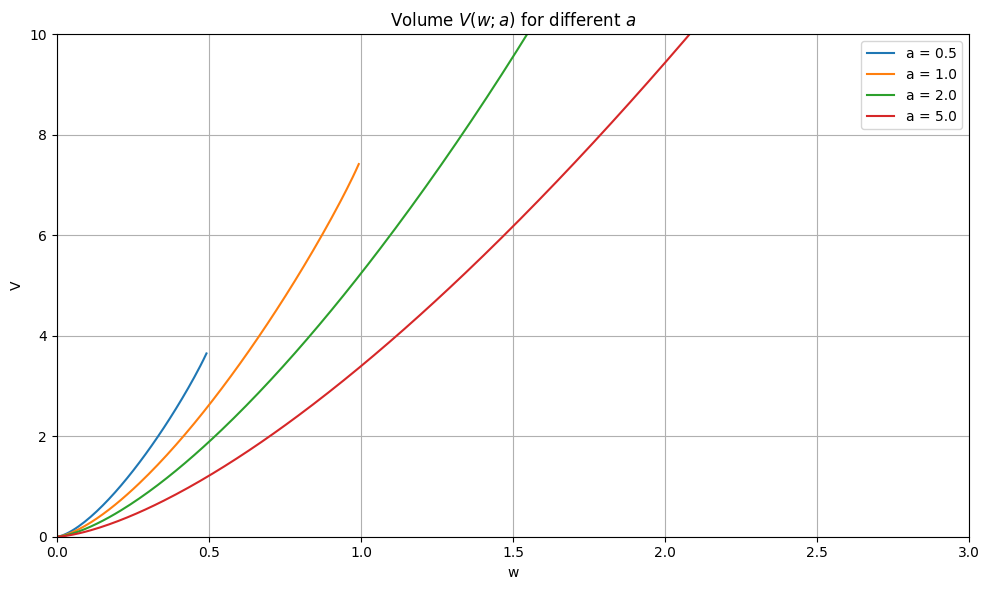

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def V(w, a):
    # Prevent division by zero or domain errors
    epsilon = 1e-9
    w = np.maximum(w, epsilon)
    denom = a + w

    sqrt1 = np.sqrt(w / denom)
    sqrt2 = np.sqrt(2 * w / denom)

    term1 = 2 * np.sqrt(2 * w * denom)
    term2 = 2 * w * np.log((1 + sqrt1) / (1 - sqrt1))
    term3 = (a - w) * np.log((1 - sqrt2) / (1 + sqrt2))

    return term1 + term2 + term3

# Define w values
w_vals = np.linspace(0.001, 5, 500)

# Values of a to try
a_values = [0.5, 1.0, 2.0, 5.0]

# Plot
plt.figure(figsize=(10, 6))
for a in a_values:
    V_vals = V(w_vals, a)
    plt.plot(w_vals, V_vals, label=f'a = {a}')

plt.title('Volume $V(w; a)$ for different $a$')
plt.xlabel('w')
plt.ylabel('V')
plt.ylim(0, 10)
plt.xlim(0, 3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()